# 1. Bitcoin and Cryptocurrencies: 

Since the launch of Bitcoin in 2008, hundreds of similar projects based on the blockchain technology have emerged. We call these cryptocurrencies (also coins or cryptos in the Internet slang). Some are extremely valuable nowadays, and others may have the potential to become extremely valuable in the future. In fact, on the 6th of December of 2021, Bitcoin has a market capitalization around $1 Trillion.

The data I will be using for my cryptocurrency exploratory data analysis is coming directly from the Coin-Gecko API. The link to the API documentation can be found here https://www.coingecko.com/en/api/documentation. I found working with the API a breeze and using the python API wrapper made setting parameters simple. The only downside is each call is limited to 250 coins, but I found a way around that to get a list of 1000 coins. 

### Setting up enviroment 

In [209]:
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')


### Connecting to Coin Gecko API

Single Coin Parameters 

In [210]:
cg.get_price(ids='bitcoin', vs_currencies='usd')

{'bitcoin': {'usd': 48471}}

JSON file received after pinging the API

In [211]:
coin_market=cg.get_coins_markets(vs_currency='usd')

In [261]:
coin_market[:1]

[{'id': 'bitcoin',
  'symbol': 'btc',
  'name': 'Bitcoin',
  'image': 'https://assets.coingecko.com/coins/images/1/large/bitcoin.png?1547033579',
  'current_price': 48471,
  'market_cap': 916676439150,
  'market_cap_rank': 1,
  'fully_diluted_valuation': 1018707947174,
  'total_volume': 28270596038,
  'high_24h': 50308,
  'low_24h': 47441,
  'price_change_24h': -1392.410487605688,
  'price_change_percentage_24h': -2.79244,
  'market_cap_change_24h': -26726927398.193726,
  'market_cap_change_percentage_24h': -2.83303,
  'circulating_supply': 18896687.0,
  'total_supply': 21000000.0,
  'max_supply': 21000000.0,
  'ath': 69045,
  'ath_change_percentage': -29.74138,
  'ath_date': '2021-11-10T14:24:11.849Z',
  'atl': 67.81,
  'atl_change_percentage': 71439.03206,
  'atl_date': '2013-07-06T00:00:00.000Z',
  'roi': None,
  'last_updated': '2021-12-10T03:25:00.060Z'}]

The downside with this API is we can only get 250 coins per call. To get around this, I'm going to make four API calls and concat them into a single dataframe. 

In [213]:
first_250_coins=cg.get_coins_markets(vs_currency='usd',per_page=250,page=1,price_change_percentage
='24h,7d')
df1=pd.DataFrame(first_250_coins)
second_250_coins=cg.get_coins_markets(vs_currency='usd',per_page=250,page=2,price_change_percentage
='24h,7d')
df2=pd.DataFrame(second_250_coins)
third_250_coins=cg.get_coins_markets(vs_currency='usd',per_page=250,page=3,price_change_percentage
='24h,7d')
df3=pd.DataFrame(third_250_coins)
forth_250_coins=cg.get_coins_markets(vs_currency='usd',per_page=250,page=4,price_change_percentage
='24h,7d')
df4=pd.DataFrame(forth_250_coins)
df=pd.concat([df1,df2,df3,df4],ignore_index=True,)
df

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,price_change_percentage_24h_in_currency,price_change_percentage_7d_in_currency
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,48471.0,916676439150,1,1018707947174.0,28270596038.0,50308.0,...,69045.0,-29.74138,2021-11-10T14:24:11.849Z,67.81,71439.03206,2013-07-06T00:00:00.000Z,None,2021-12-10T03:25:00.060Z,-2.7924383263404384,-14.22282311402837
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,4155.24,493586415595,2,NaN,24070832561.0,4407.44,...,4878.26,-14.74185,2021-11-10T14:24:19.604Z,0.432979,960481.45801,2015-10-20T00:00:00.000Z,"{'times': 113.69423777357225, 'currency': 'btc...",2021-12-10T03:24:18.385Z,-5.45337672861116,-8.058433543569944
2,binancecoin,bnb,Binance Coin,https://assets.coingecko.com/coins/images/825/...,579.28,97595424357,3,97595424357.0,2007815364.0,607.33,...,686.31,-15.42898,2021-05-10T07:24:17.097Z,0.0398177,1457584.69949,2017-10-19T00:00:00.000Z,None,2021-12-10T03:25:40.240Z,-4.047705974219436,-6.64440505615055
3,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.999768,77180934430,4,NaN,60269165356.0,1.01,...,1.32,-24.42195,2018-07-24T00:00:00.000Z,0.572521,74.66078,2015-03-02T00:00:00.000Z,None,2021-12-10T03:22:31.902Z,-0.10801497173107566,0.20295697255838682
4,solana,sol,Solana,https://assets.coingecko.com/coins/images/4128...,180.92,55705620939,5,NaN,1809924235.0,191.93,...,259.96,-30.27882,2021-11-06T21:54:35.825Z,0.500801,36091.33735,2020-05-11T19:35:23.449Z,None,2021-12-10T03:24:53.168Z,-4.902930781530062,-22.207433638951198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,pibble,pib,Pibble,https://assets.coingecko.com/coins/images/2972...,0.00156062,18337115,996,NaN,39357.0,0.00161959,...,0.02623939,-94.04919,2021-04-02T09:08:22.703Z,5.627e-05,2674.73595,2020-05-06T23:55:04.172Z,"{'times': -0.9248934563020185, 'currency': 'et...",2021-12-10T03:24:07.951Z,-3.641464772998457,-23.882136619440914
996,draken,drk,Draken,https://assets.coingecko.com/coins/images/1575...,0.01879855,18336932,997,84198721.0,0.0,0.01887865,...,0.04441833,-57.67838,2021-07-20T01:12:27.834Z,0.00701652,167.9186,2021-06-01T11:25:41.506Z,None,2021-12-10T03:18:49.179Z,-0.31430650535809584,-0.5307132249264026
997,nectar-token,nec,Nectar,https://assets.coingecko.com/coins/images/3559...,0.115536,18292367,998,71416803.0,0.0,0.115536,...,0.666145,-82.65601,2018-05-15T00:11:18.020Z,0.00102922,11125.63507,2018-12-17T00:00:00.000Z,None,2021-12-10T03:18:46.561Z,0.0,0.0
998,etherrock-72,pebble,Etherrock #72,https://assets.coingecko.com/coins/images/1796...,0.00025237,18170414,999,18170414.0,2963.19,0.00025439,...,0.00228217,-88.94179,2021-10-24T07:48:52.955Z,3.129e-05,706.45931,2021-08-30T10:43:31.102Z,None,2021-12-10T03:14:34.346Z,-0.08133933288430695,72.51806995563392


Our Pandas dataframe with 1000 coins!

In [214]:
for col in df:
    print(col)

id
symbol
name
image
current_price
market_cap
market_cap_rank
fully_diluted_valuation
total_volume
high_24h
low_24h
price_change_24h
price_change_percentage_24h
market_cap_change_24h
market_cap_change_percentage_24h
circulating_supply
total_supply
max_supply
ath
ath_change_percentage
ath_date
atl
atl_change_percentage
atl_date
roi
last_updated
price_change_percentage_24h_in_currency
price_change_percentage_7d_in_currency


In [215]:
df.shape

(1000, 28)

Getting rid of scientific notation

In [216]:
pd.set_option('display.float_format', str)
df

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated,price_change_percentage_24h_in_currency,price_change_percentage_7d_in_currency
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,48471.0,916676439150,1,1018707947174.0,28270596038.0,50308.0,...,69045.0,-29.74138,2021-11-10T14:24:11.849Z,67.81,71439.03206,2013-07-06T00:00:00.000Z,None,2021-12-10T03:25:00.060Z,-2.7924383263404384,-14.22282311402837
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,4155.24,493586415595,2,NaN,24070832561.0,4407.44,...,4878.26,-14.74185,2021-11-10T14:24:19.604Z,0.432979,960481.45801,2015-10-20T00:00:00.000Z,"{'times': 113.69423777357225, 'currency': 'btc...",2021-12-10T03:24:18.385Z,-5.45337672861116,-8.058433543569944
2,binancecoin,bnb,Binance Coin,https://assets.coingecko.com/coins/images/825/...,579.28,97595424357,3,97595424357.0,2007815364.0,607.33,...,686.31,-15.42898,2021-05-10T07:24:17.097Z,0.0398177,1457584.69949,2017-10-19T00:00:00.000Z,None,2021-12-10T03:25:40.240Z,-4.047705974219436,-6.64440505615055
3,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.999768,77180934430,4,NaN,60269165356.0,1.01,...,1.32,-24.42195,2018-07-24T00:00:00.000Z,0.572521,74.66078,2015-03-02T00:00:00.000Z,None,2021-12-10T03:22:31.902Z,-0.10801497173107566,0.20295697255838682
4,solana,sol,Solana,https://assets.coingecko.com/coins/images/4128...,180.92,55705620939,5,NaN,1809924235.0,191.93,...,259.96,-30.27882,2021-11-06T21:54:35.825Z,0.500801,36091.33735,2020-05-11T19:35:23.449Z,None,2021-12-10T03:24:53.168Z,-4.902930781530062,-22.207433638951198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,pibble,pib,Pibble,https://assets.coingecko.com/coins/images/2972...,0.00156062,18337115,996,NaN,39357.0,0.00161959,...,0.02623939,-94.04919,2021-04-02T09:08:22.703Z,5.627e-05,2674.73595,2020-05-06T23:55:04.172Z,"{'times': -0.9248934563020185, 'currency': 'et...",2021-12-10T03:24:07.951Z,-3.641464772998457,-23.882136619440914
996,draken,drk,Draken,https://assets.coingecko.com/coins/images/1575...,0.01879855,18336932,997,84198721.0,0.0,0.01887865,...,0.04441833,-57.67838,2021-07-20T01:12:27.834Z,0.00701652,167.9186,2021-06-01T11:25:41.506Z,None,2021-12-10T03:18:49.179Z,-0.31430650535809584,-0.5307132249264026
997,nectar-token,nec,Nectar,https://assets.coingecko.com/coins/images/3559...,0.115536,18292367,998,71416803.0,0.0,0.115536,...,0.666145,-82.65601,2018-05-15T00:11:18.020Z,0.00102922,11125.63507,2018-12-17T00:00:00.000Z,None,2021-12-10T03:18:46.561Z,0.0,0.0
998,etherrock-72,pebble,Etherrock #72,https://assets.coingecko.com/coins/images/1796...,0.00025237,18170414,999,18170414.0,2963.19,0.00025439,...,0.00228217,-88.94179,2021-10-24T07:48:52.955Z,3.129e-05,706.45931,2021-08-30T10:43:31.102Z,None,2021-12-10T03:14:34.346Z,-0.08133933288430695,72.51806995563392


Here's my full data frame with all the columns I think are most relevent

In [217]:
coins=df[['symbol','name','market_cap','current_price','market_cap_rank','price_change_percentage_24h_in_currency','price_change_percentage_7d_in_currency']]
coins.head()

,symbol,name,market_cap,current_price,market_cap_rank,price_change_percentage_24h_in_currency,price_change_percentage_7d_in_currency
0,btc,Bitcoin,916676439150,48471.0,1,-2.7924383263404384,-14.22282311402837
1,eth,Ethereum,493586415595,4155.24,2,-5.45337672861116,-8.058433543569944
2,bnb,Binance Coin,97595424357,579.28,3,-4.047705974219436,-6.64440505615055
3,usdt,Tether,77180934430,0.999768,4,-0.10801497173107566,0.20295697255838682
4,sol,Solana,55705620939,180.92,5,-4.902930781530062,-22.207433638951198


### Discarding the cryptocurrencies with NaN Values

In [218]:
coins.count()

symbol                                     1000
name                                       1000
market_cap                                 1000
current_price                               998
market_cap_rank                            1000
price_change_percentage_24h_in_currency     990
price_change_percentage_7d_in_currency      989
dtype: int64

In [219]:
coins.isna().sum()


symbol                                      0
name                                        0
market_cap                                  0
current_price                               2
market_cap_rank                             0
price_change_percentage_24h_in_currency    10
price_change_percentage_7d_in_currency     11
dtype: int64

In [220]:
coins[coins.isna().any(axis=1)]

,symbol,name,market_cap,current_price,market_cap_rank,price_change_percentage_24h_in_currency,price_change_percentage_7d_in_currency
400,koge,BNB48 Club Token,127100662,63.43,401,-2.5994559878450176,NaN
466,gf,GuildFi,96911227,2.24,467,-8.369093292766888,NaN
468,obtc,BoringDAO BTC,96503441,48003.0,469,-4.944451321361828,NaN
549,zai,Zero Collateral Dai,73529894,0.00091691,550,NaN,NaN
622,dust,DUST Token,54045048,0.222347,623,NaN,NaN
631,zpay,ZoidPay,52736435,NaN,632,NaN,NaN
650,slink,sLINK,49190525,33.52,651,NaN,NaN
683,hoo,Hoo Token,44511122,NaN,684,NaN,NaN
816,nex,Nash,29428847,1.01,817,NaN,-0.43026533811260914
825,bpay,BNBPay,28927656,0.0057437,826,NaN,-13.651752249415509


In [221]:
coins=coins.dropna()
coins.shape

(987, 7)

In [222]:
coins.duplicated().sum()

0

### How big is Bitcoin compared with the rest of the cryptocurrencies?


In [223]:
def top_10():
    cap=coins[['name','market_cap']]
    TOP_CAP_TITLE = 'Top 10 market capitalization'
    TOP_CAP_YLABEL = '% of total cap'
    cap10=cap.sort_values('market_cap',ascending=False).iloc[0:10].set_index('name')
    return cap10
top_10()

,market_cap
name,
Bitcoin,916676439150
Ethereum,493586415595
Binance Coin,97595424357
Tether,77180934430
Solana,55705620939
Cardano,41771155691
USD Coin,40999068016
XRP,40456750111
Polkadot,29163312626


In [224]:
cap10=cap10.assign(percent_of_market = lambda x:x.market_cap/cap.market_cap.sum()*100)

<AxesSubplot:title={'center':'Top 10 market capitalization'}, xlabel='name', ylabel='% of total cap'>

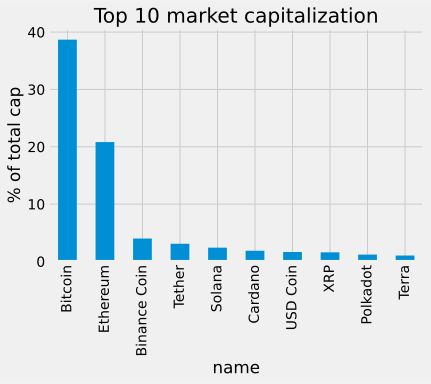

In [225]:
def top_10_chart():
    top10=cap10.assign(percent_of_market = lambda x:x.market_cap/cap.market_cap.sum()*100)
    ax=top10.percent_of_market.plot.bar()
    ax.set_ylabel(TOP_CAP_YLABEL)
    ax.set_title(TOP_CAP_TITLE)
    return ax
top_10_chart()


Text(0.5, 1.0, 'Top 10 market capitalization')

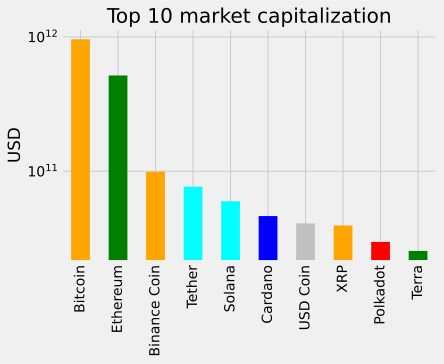

In [226]:
colors = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']
ax=cap10.market_cap.plot.bar(color=colors,logy=True)
ax.set_ylabel('USD')
ax.set_xlabel('')
ax.set_title('Top 10 market capitalization')


Bitcoin and Ethereum make up over 50 percent of the entire Cryptocurrency market!

### What is going on? Volatility in cryptocurrencies

In [227]:
volatility=coins[['name','price_change_percentage_24h_in_currency']].set_index('name')
volatility =  volatility.sort_values('price_change_percentage_24h_in_currency',ascending=True)
volatility.head()

,price_change_percentage_24h_in_currency
name,
Stronghold Token,-33.86258025673607
Reddcoin,-26.322601968947694
Clearpool,-25.481550552061528
Ribbon Finance,-23.246529724038577
Opacity,-22.852366786515688


Top 5 losers in the last 24 hours

In [228]:
volatility24=coins[['name','price_change_percentage_24h_in_currency']].set_index('name')
volatility24 =  volatility.sort_values('price_change_percentage_24h_in_currency',ascending=False)
volatility24.head()

,price_change_percentage_24h_in_currency
name,
Phoenix Global [OLD],5311.082392669528
Mobius,335.5482720574321
Veritaseum,96.6013642762148
Circuits of Value,60.67197600237779
StackOS,56.728590175421424


Top 5 winners in the last 24 hours.

(<Figure size 720x432 with 2 Axes>, <AxesSubplot:xlabel='name'>)

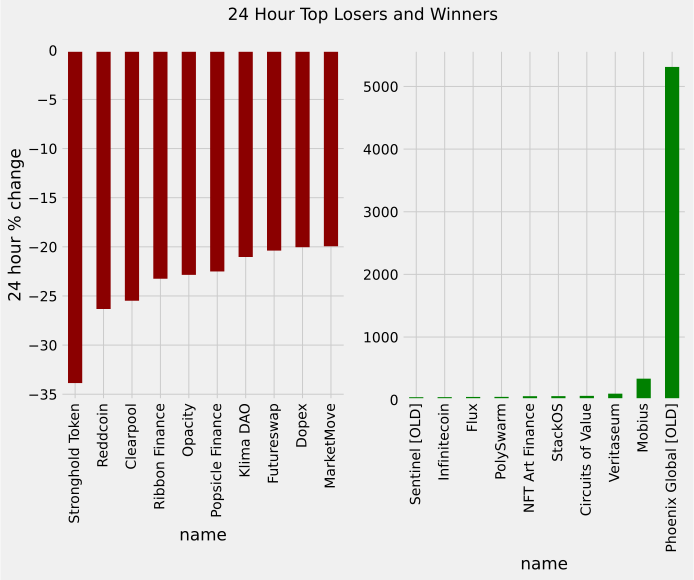

In [242]:
def top10_subplot(volatility_series, title):
    # making the subplot and the figure for nrows and ncolumns
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 6))
    # Plotting with pandas the barchart for the top 10 losers with the color RED
    ax = volatility_series[:10].plot.bar(color="darkred", ax=axes[0])
    # Setting the main title to TITLE
    fig.suptitle(title)
    # Setting the ylabel to "% change"
    ax.set_ylabel('24 hour % change')
    # Same as above, but for the top 10 winners and in darkblue
    ax = volatility_series[-10:].plot.bar(color="green", ax=axes[1])
    # Returning this for good practice, might use later
    return fig, ax

DTITLE = "24 Hour Top Losers and Winners"

# Calling the function above with the volatility.percent_change_24h series
# and title DTITLE 
top10_subplot(volatility.price_change_percentage_24h_in_currency, DTITLE)

(<Figure size 720x432 with 2 Axes>, <AxesSubplot:xlabel='name'>)

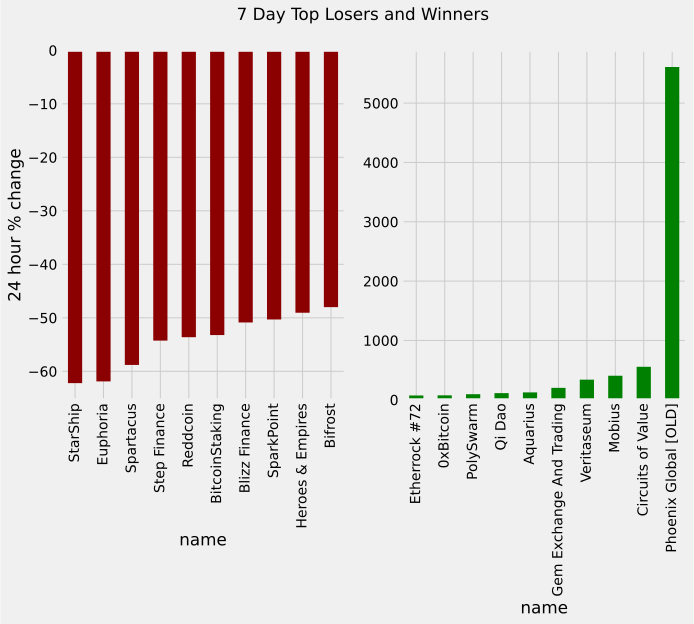

In [243]:
volatility2=coins[['name','price_change_percentage_7d_in_currency']].set_index('name')
volatility2 =  volatility2.sort_values('price_change_percentage_7d_in_currency',ascending=True)
volatility2.head()
def top10_subplot_7d(volatility_series, title):
    # making the subplot and the figure for nrows and ncolumns
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 6))
    # Plotting with pandas the barchart for the top 10 losers with the color RED
    ax = volatility2_series[:10].plot.bar(color="darkred", ax=axes[0])
    # Setting the main title to TITLE
    fig.suptitle(title)
    # Setting the ylabel to "% change"
    ax.set_ylabel('24 hour % change')
    # Same as above, but for the top 10 winners and in darkblue
    ax = volatility_series2[-10:].plot.bar(color="green", ax=axes[1])
    # Returning this for good practice, might use later
    return fig, ax

DTITLE = "7 Day Top Losers and Winners"

# Calling the function above with the volatility.percent_change_24h series
# and title DTITLE 
top10_subplot(volatility2.price_change_percentage_7d_in_currency, DTITLE)

In [258]:
weekly_loss_coins=volatility2
weekly_loss_coins.loc[weekly_loss_coins.price_change_percentage_7d_in_currency >0].count()
#coins with gains in the last 7 days

price_change_percentage_7d_in_currency    112
dtype: int64

In [255]:
weekly_loss_coins.loc[weekly_loss_coins.price_change_percentage_7d_in_currency <0].count()
#coins with losses in the last 7 days. 

price_change_percentage_7d_in_currency    869
dtype: int64

### Most coins are tiny

In [233]:
large_caps=coins.loc[coins.market_cap>10000000000]
large_caps

,symbol,name,market_cap,current_price,market_cap_rank,price_change_percentage_24h_in_currency,price_change_percentage_7d_in_currency
0,btc,Bitcoin,916676439150,48471.0,1,-2.7924383263404384,-14.22282311402837
1,eth,Ethereum,493586415595,4155.24,2,-5.45337672861116,-8.058433543569944
2,bnb,Binance Coin,97595424357,579.28,3,-4.047705974219436,-6.64440505615055
3,usdt,Tether,77180934430,0.999768,4,-0.10801497173107566,0.20295697255838682
4,sol,Solana,55705620939,180.92,5,-4.902930781530062,-22.207433638951198
5,ada,Cardano,41771155691,1.3,6,-5.3388205671938,-24.084479685405732
6,usdc,USD Coin,40999068016,0.9984,7,0.04240439917449024,0.02157773323887115
7,xrp,XRP,40456750111,0.854199,8,-0.15791175150261563,-12.768320079443956
8,dot,Polkadot,29163312626,27.39,9,-5.593860106655768,-23.32136385417946
9,luna,Terra,25940106530,68.32,10,-8.20518826652749,3.8205979772662575


**Coin Cap Breakdown**:
* Large cap: +10 billion
* Mid cap: 2 billion - 10 billion
* Small cap: 300 million - 2 billion
* Micro cap: 50 million - 300 million
* Nano cap: Below 50 million

In [234]:
cap_type=coins[['name','market_cap']]
cap_type

,name,market_cap
0,Bitcoin,916676439150
1,Ethereum,493586415595
2,Binance Coin,97595424357
3,Tether,77180934430
4,Solana,55705620939
...,...,...
995,Pibble,18337115
996,Draken,18336932
997,Nectar,18292367
998,Etherrock #72,18170414


In [235]:
cap_type['Market_Cap_Type']=np.where(
     cap_type['market_cap'].between(0, 50000000, inclusive=False), 
    'Nano', 
     np.where(
        cap_type['market_cap'].between(50000000, 300000000, inclusive=False), 'Micro',
    np.where(
        cap_type['market_cap'].between(300000000, 2000000000, inclusive=False), 'Small',
    np.where(
        cap_type['market_cap'].between(2000000000, 10000000000, inclusive=False), 'Mid','Large'
     
         
     )))
)

<ipython-input-235-4e0b44d90da4>:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  cap_type['market_cap'].between(0, 50000000, inclusive=False),
<ipython-input-235-4e0b44d90da4>:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  cap_type['market_cap'].between(50000000, 300000000, inclusive=False), 'Micro',
<ipython-input-235-4e0b44d90da4>:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  cap_type['market_cap'].between(300000000, 2000000000, inclusive=False), 'Small',
<ipython-input-235-4e0b44d90da4>:9: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  cap_type['market_cap'].between(2000000000, 10000000000, inclusive=False), 'Mid','Large'
<ipython-input-235-4e0b44d90da4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

Text(0.5, 1.0, 'Coin Market Cap Share')

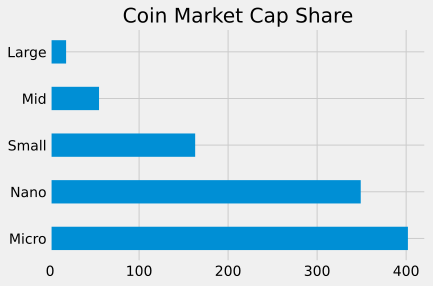

In [236]:
cap_type.Market_Cap_Type.value_counts().plot(kind='barh')
plt.title('Coin Market Cap Share')

([<matplotlib.patches.Wedge at 0x7fa5ffb6cd90>,
 [Text(0.34457050788892357, 1.1494655997867746, ''),
  Text(-1.0363540846676396, -0.6049547182993942, ''),
  Text(0.6094885114396983, -0.9157094268505818, ''),
  Text(1.054178085149614, -0.31417919216633877, ''),
  Text(1.0981950780458716, -0.06298865418328836, '')],
 [Text(0.20099946293520538, 0.6705215998756184, '41%'),
  Text(-0.6045398827227897, -0.35289025234131327, '35%'),
  Text(0.33244827896710816, -0.4994778691912264, '17%'),
  Text(0.5750062282634258, -0.17137046845436657, '6%'),
  Text(0.5990154971159299, -0.03435744773633911, '2%')])

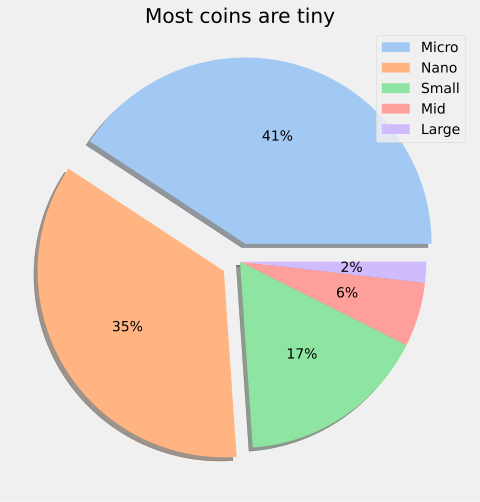

In [250]:
def perc(x):
    percent=x/984*100
    return percent
def market_pie_chart():
    percent_of_market = cap_type.Market_Cap_Type.value_counts().rename_axis('market_cap_type').reset_index(name='counts')
    percent_of_market['share_percentage']=percent_of_market.counts.apply(perc)
    plt.figure(figsize=(10,8))
    colors = sns.color_palette('pastel')[0:5]
    a=plt.pie(data=percent_of_market,x='share_percentage',colors=colors,autopct='%.0f%%',explode=(.1, .1, 0, 0,0),shadow=True )  
    plt.title('Most coins are tiny')
    plt.legend(percent_of_market['market_cap_type'])
    return a
market_pie_chart()

### **Key Findings**

* **Bitcoin and Ethereum make up a major share of the market**. Bitcoin alone makes up around 48% of the entire Cryptocurrency Market.





* **Crypto Currency is a very volatile asset**. Since I had live data through the use of the API, as I was working through some of the volatility charts I was seeing massive changes in percent change in just hours. At the time of writing this Phoenix Global OLD was up over 5000% in the last 24 hours followed by Mobius which is up over 300 % in 24 hours. Both Pheonix old and Mobis have market caps around 25 Million which makes them very volatile to any price movement in both directions which makes them very risky. These types of coins are also not seen on normal crypto exchanges like CoinBase due to their risk which makes them harder to buy as well. During my analysis the entire market took a crash so I was able to see some big losses in price as well. Stronghold token alone was down 33% in 24 hours as well as many others down 25% from the day before. Looking at the 7 Day chart, Starship and Euphoria were down over 60% in the last 7 days! Looking at all coins in the last 7 days, only 112 of the 1000 coins had posted gains in the last 7 days. As with any investing, there’s a big risk and reward situation there for people willing to take it. Look at this data a few weeks ago during a heavy bull ruin, the gains would have far out weight the losses!





* **Most coins in the market are tiny regarding their market cap**. 76% of coins were considered Nano or Micro meaning their market cap was less than 300 Million. A few years ago that might have been a big market cap, but now with bitcoin hovering around 1 trillion dollars, the field has really widened. 


### Short Comings in Analysis


I would have liked to focus on a select group of the top coins on the market right now and build a price prediction model based on the Coin Gecko api data. I will be visiting this project in a few months to start working on building out these models after studying some more on what models for this would be best!
